In [1]:
# 引入套件
import pandas as pd
import numpy as np
import seaborn as sns
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
pd.set_option("display.max_columns",0)

In [2]:
# 引入與檢視資料
new=pd.read_csv(r"C:\Users\Desktop\datamining\lab1\Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data.csv",sep=",")
new.info()
new


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  1500 non-null   object
 1   comment    1500 non-null   object
dtypes: object(2)
memory usage: 23.6+ KB


,sentiment,comment
0,not nostalgia,He was a singer with a golden voice that I lov...
1,nostalgia,The mist beautiful voice ever I listened to hi...
2,nostalgia,I have most of Mr. Reeves songs. Always love ...
3,not nostalgia,30 day leave from 1st tour in Viet Nam to conv...
4,nostalgia,listening to his songs reminds me of my mum wh...
...,...,...
1495,not nostalgia,"i don't know!..but the opening of the video,....."
1496,not nostalgia,it's sad this is such a beautiful song when yo...
1497,not nostalgia,"Dear Friend, I think age and time is not that ..."
1498,nostalgia,I was born in 1954 and started to be aware of ...


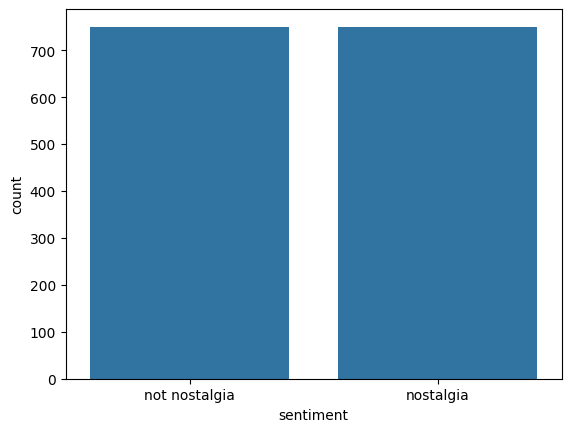

In [3]:
# 視覺化
sns.countplot(data=new,x="sentiment")
plt.show()

### Feature creation


In [4]:
import nltk
nltk.download("punkt")


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mocce\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [5]:
# 調整資料成可轉換的形式
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize

new["word"] = new["comment"].apply(lambda x : [word_tokenize(x)])

In [6]:
# 做出count vector matrix(看字數出現的頻率)
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
data_count=count_vect.fit_transform(new["comment"])
data_count

<1500x3730 sparse matrix of type '<class 'numpy.int64'>'
	with 31260 stored elements in Compressed Sparse Row format>

In [7]:
# 把count vector matrix從稀疏矩陣轉成一般矩陣
len(count_vect.get_feature_names_out())
bow=data_count.toarray()
bow

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

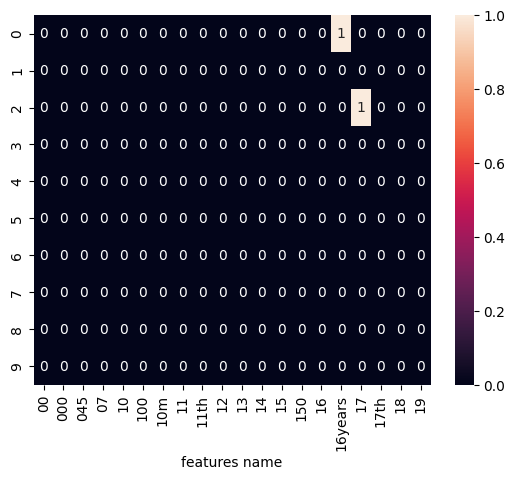

In [8]:
# 將矩陣視覺化
temp=bow[0:10,0:20]
temp=pd.DataFrame(temp,index=range(10),columns=count_vect.get_feature_names_out()[0:20])
sns.heatmap(data=temp,annot=True,color="Red")
plt.xlabel("features name")
plt.show()

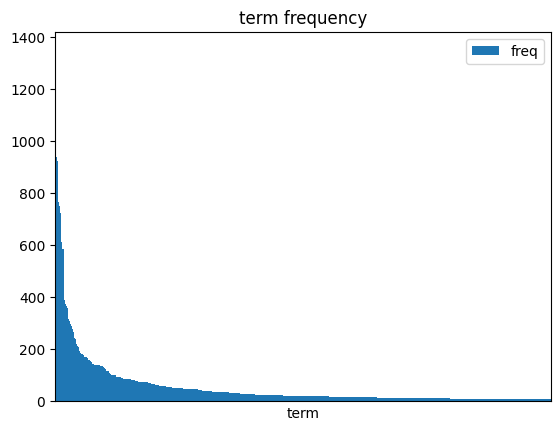

In [9]:
temp=bow.sum(axis=0)
temp=pd.DataFrame(temp,index=count_vect.get_feature_names_out(),columns=["freq"])
temp.sort_values(by="freq",ascending=False,inplace=True)
temp.plot(kind="bar",width=1)
plt.xticks([])
plt.xlabel("term")
plt.xlim(0,500)
plt.title("term frequency")
plt.show()

<Figure size 1500x800 with 0 Axes>

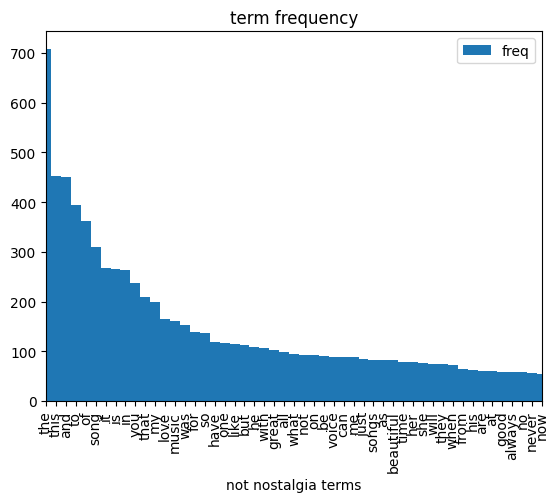

In [10]:
# 根據情緒分類，看不同情緒下的term frequency(只用各自情緒下的文本作為feature)
category=new["sentiment"].unique()
# sent可以選擇1或0
sent=0
news_category=new[new["sentiment"]==category[sent]]
count_vect = CountVectorizer()
data_count=count_vect.fit_transform(news_category["comment"])
temp=data_count.sum(axis=0).T
temp=pd.DataFrame(temp,index=count_vect.get_feature_names_out(),columns=["freq"])
temp.sort_values(by="freq",ascending=False,inplace=True)
plt.figure(figsize=(15,8))
temp.plot(kind="bar",width=1)
plt.xticks(rotation=90)
plt.xlabel(category[sent]+" terms")
# 可以調整xlim看不同範圍的term frequency
plt.xlim(0,50)
plt.title("term frequency")
plt.show()

<Figure size 1500x800 with 0 Axes>

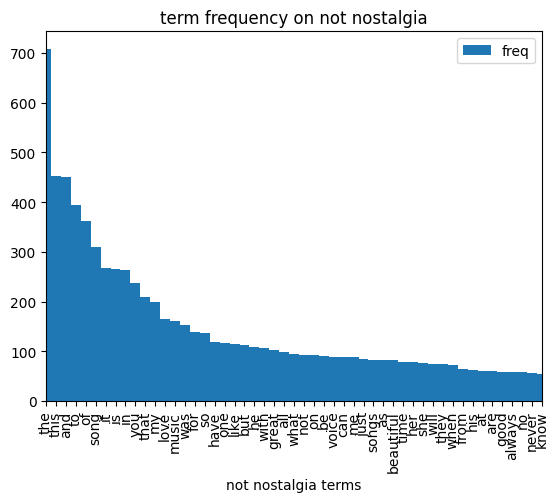

In [11]:
# 看不同的sentiment會不會有不同的term frequency 分配(用整份文件的資料作為feature)
count_vect = CountVectorizer()
data_count=count_vect.fit_transform(new["comment"])

# sent可以選擇1或0
sent=0
term_freq_index=new[new["sentiment"]==category[sent]].index
term_freq_sent=data_count[term_freq_index][:].sum(axis=0).T
term_freq_sent
temp=pd.DataFrame(term_freq_sent,index=count_vect.get_feature_names_out(),columns=["freq"])
temp.sort_values(by="freq",ascending=False,inplace=True)
plt.figure(figsize=(15,8))
temp.plot(kind="bar",width=1)
plt.xticks(rotation=90)
plt.xlabel(category[sent]+" terms")
# 可以調整xlim看不同範圍的term frequency
plt.xlim(0,50)
plt.title(f"term frequency on {category[sent]}")
plt.show()

In [12]:
def filter_top_bottom_words(data,top_percent,bottom_percent,sen):
    count_vect = CountVectorizer()
    filter_data=data[data["sentiment"]==category[sen]]
    data_count=count_vect.fit_transform(filter_data["comment"])
    term_freq_sent=data_count[:,:].sum(axis=0).T
    temp=pd.DataFrame({"frequency":term_freq_sent.A1,"c":count_vect.get_feature_names_out()})
    top_num=int(len(temp)*top_percent)
    buttom_num=int(len(temp)*bottom_percent)
    top_num=list(temp.nlargest(top_num,columns="frequency").index)
    buttom_num=list(temp.nsmallest(buttom_num,columns="frequency").index)
    whole=top_num+buttom_num
    data_count_filted=np.delete(data_count.toarray(),whole,axis=1)
    feature_name=np.delete(count_vect.get_feature_names_out(),whole)
    return data_count_filted,feature_name

In [13]:
# 根據不同的sentiment篩選掉各自類別的top and bottom frequency word
# 根據不同的sentiment重新fit_transform過
# sen可以選擇1或0

filter_data_0,filter_feature_0=filter_top_bottom_words(new,0.05,0.1,0)
filter_data_0

filter_data_1,filter_feature_1=filter_top_bottom_words(new,0.05,0.1,1)
filter_data_1

filter_data=[filter_data_0,filter_data_1]
filter_feature=[filter_feature_0,filter_feature_1]

In [14]:
temp=pd.DataFrame(filter_data_0,columns=filter_feature_0)
temp

,000,10,100,11,14,15,150,16,17,18,19,1954,1958,1960,1966,1967,1980,1988,1st,20,2019,22,25,27,29,2nd,30,40,50,50s,60,60s,70,70s,80,80s,90,90s,able,absolutely,...,woo,word,words,work,worked,working,worlds,worldwide,worst,worthwhile,wouldn,wow,wrenching,write,writer,writers,written,wrong,wrote,wuv,wwii,xd,ya,yeah,year,yes,yester,yesterday,yet,young,younger,youngest,youngsters,yourself,youth,youtube,yrs,yuo,zealand,zulus
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
746,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
747,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
748,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [15]:
# 看不同的sentiment下的word frequency(排除掉最高跟最低出現比例的word後)
sent=1
temp=pd.DataFrame(filter_data[sent],columns=filter_feature[sent])
temp.sum(axis=0).sort_values(ascending=False).nlargest(15)


takes    30
will     30
over     29
ever     29
would    29
about    28
wish     28
only     28
go       28
or       28
today    27
year     27
them     27
long     26
jim      26
dtype: int64

In [16]:
# 將前述資料建構成完整的Dataframe 並用dict包起來
stor={}
temp=["filterd_not_nostalgia","filterd_nostalgia"]
for i in range(len(temp)):
    stor[temp[i]]=pd.DataFrame(filter_data[i],columns=filter_feature[i])


In [17]:
# from PAMI.extras.DF2DB import DenseFormatDF as db
#  # Loop through the dictionary of term-document DataFrames
# for i in temp:
#     # Create the DenseFormatDF object and convert to a transactional database
#     obj = db.DenseFormatDF(stor[i])
#     obj.convert2TransactionalDatabase(f'td_freq_db_{i}.csv', '>=', 1)

## TF_IDF featrue

In [45]:
# 創建TF-IDF feature
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()
tf_idf=tfidf_vectorizer.fit_transform(new["comment"])
tf_idf=tf_idf.toarray()
tfidf_vectorizer.get_feature_names_out()
tf_idf_df=pd.DataFrame(tf_idf,columns=tfidf_vectorizer.get_feature_names_out())
tf_idf_df=round(tf_idf_df,4)
tf_idf_df

,00,000,045,07,10,100,10m,11,11th,12,13,14,15,150,16,16years,17,17th,18,19,1927,1930,1930s,1950,1950s,1952,1954,1955,1956,1957,1958,1960,1960s,1962,1963,1964,1965,1966,1967,1968,...,writing,written,wrong,wrote,wuv,wwii,xd,ya,yahooo,yarbirds,yardbirds,yeah,year,yearn,years,yeas,yeh,yes,yester,yesterday,yet,yo,yokel,you,young,younger,youngest,youngster,youngsters,your,yours,yourself,youth,youthful,youtube,yrs,yuo,yup,zealand,zulus
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.232,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1710,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.1402,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0693,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0607,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1496,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.3116,0.0,0.0,0.0,0.0,0.0,0.2539,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1497,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1531,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1498,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1938,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0897,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## use PAMI find pattern

In [53]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=9
obj4 = alg.FPGrowth(iFile='td_freq_db_filterd_not_nostalgia.csv', minSup=minSup)
obj4.mine()
frequentPatternsDF_not_nostalgia= obj4.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_not_nostalgia))) #print the total number of patterns
print('Runtime: ' + str(obj4.getRuntime())) #measure the runtime
obj4.save('td_freq_db_filterd_not_nostalgia.txt') #save the patterns
frequentPatternsDF_not_nostalgia


Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 144
Runtime: 0.0155487060546875


,Patterns,Support
0,favorites,9
1,special,9
2,soul,9
3,mind,9
4,60,9
...,...,...
139,elvis,21
140,every,21
141,loved,21
142,them,21


In [73]:
obj4 = alg.FPGrowth(iFile='td_freq_db_filterd_nostalgia.csv', minSup=minSup)
obj4.mine()
frequentPatternsDF_nostalgia= obj4.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_nostalgia))) #print the total number of patterns
print('Runtime: ' + str(obj4.getRuntime())) #measure the runtime
obj4.save('td_freq_db_filterd_nostalgia.txt') #save the patterns
frequentPatternsDF_nostalgia

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 180
Runtime: 0.01657581329345703


,Patterns,Support
0,find,9
1,down,9
2,few,9
3,its,9
4,sure,9
...,...,...
175,ever,28
176,would,28
177,will,28
178,go,28


In [102]:
# 處理掉重複出現的words(從上面處理完的dataframe裡面挖)
dfs=[frequentPatternsDF_not_nostalgia,frequentPatternsDF_nostalgia]
temp=pd.concat([frequentPatternsDF_not_nostalgia,frequentPatternsDF_nostalgia])
temp.drop(columns="Support",inplace=True)
temp=pd.DataFrame(temp.value_counts())
saves=temp[temp["count"]==1].reset_index(drop=False)
dump=temp[temp["count"]>1].reset_index(drop=False)
saves

,Patterns,count
0,another,1
1,anymore,1
2,anyone,1
3,awesome,1
4,back,1
...,...,...
217,about,1
218,after,1
219,again,1
220,amazing,1


In [110]:
# 把只出現一次的word標記出來後，把各自category的data依據只出現一次的word篩選，最後合併
filt1=frequentPatternsDF_not_nostalgia[frequentPatternsDF_not_nostalgia["Patterns"].isin(saves["Patterns"])]
filt2=frequentPatternsDF_nostalgia[frequentPatternsDF_nostalgia["Patterns"].isin(saves["Patterns"])]
final_pat=pd.concat([filt1,filt2]).sort_values(by="Support",ascending=False)
final_pat

,Patterns,Support
179,takes,30
176,would,28
175,ever,28
177,will,28
173,or,26
...,...,...
8,along,9
9,tv,9
10,until,9
12,records,9


In [153]:
# 增強那些比較有資訊量的特徵權重(會有重複的欄位)
count_vect = CountVectorizer()
new_tdm = count_vect.fit_transform(new['comment'])  
terms = count_vect.get_feature_names_out() 
new['tokenized_comment'] = new['comment'].str.split().apply(set)
pattern_matrix = pd.DataFrame(0, index=new.index, columns=final_pat['Patterns'])
pattern_matrix


for pattern in final_pat['Patterns']:
    pattern_words = set(pattern.split())  # Tokenize pattern into words
    pattern_matrix[pattern] = new['tokenized_comment'].apply(lambda x: 1 if pattern_words.issubset(x) else 0)
tdm_df = pd.DataFrame(new_tdm.toarray(), columns=terms, index=new.index)
augmented_df = pd.concat([tdm_df, pattern_matrix], axis=1)
augmented_df

,00,000,045,07,10,100,10m,11,11th,12,13,14,15,150,16,16years,17,17th,18,19,1927,1930,1930s,1950,1950s,1952,1954,1955,1956,1957,1958,1960,1960s,1962,1963,1964,1965,1966,1967,1968,...,emotion,tell,says,rock,thing,ago,sings,lady,teen,friends,its,though,please,person,wonder,things,ones,family,almost,end,soul,mind,favorites,special,sung,handsome,ll,happy,perfect,pure,others,player,place,left,together,along,tv,until,records,karen
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1496,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1497,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1498,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [217]:
new

,sentiment,comment,word,tokenized_comment,bin_sentiment
0,not nostalgia,He was a singer with a golden voice that I lov...,"[[He, was, a, singer, with, a, golden, voice, ...","{Although, golden, love, hear, relaxed,, now,,...",1
1,nostalgia,The mist beautiful voice ever I listened to hi...,"[[The, mist, beautiful, voice, ever, I, listen...","{love, kid, when, and, to, beautiful, of, list...",0
2,nostalgia,I have most of Mr. Reeves songs. Always love ...,"[[I, have, most, of, Mr., Reeves, songs, ., Al...","{gentle,, songs., around., love, up, Always, l...",0
3,not nostalgia,30 day leave from 1st tour in Viet Nam to conv...,"[[30, day, leave, from, 1st, tour, in, Viet, N...","{from, ""marry, 47, receive., man, Viet, leave,...",1
4,nostalgia,listening to his songs reminds me of my mum wh...,"[[listening, to, his, songs, reminds, me, of, ...","{of, my, played, everyday, mum, me, him, remin...",0
...,...,...,...,...,...
1495,not nostalgia,"i don't know!..but the opening of the video,.....","[[i, do, n't, know, !, .., but, the, opening, ...","{him,..would, that, painter, as, of, well!...o...",1
1496,not nostalgia,it's sad this is such a beautiful song when yo...,"[[it, 's, sad, this, is, such, a, beautiful, s...","{love, sad, feel.., song, when, and, to, beaut...",1
1497,not nostalgia,"Dear Friend, I think age and time is not that ...","[[Dear, Friend, ,, I, think, age, and, time, i...","{song., Friend,, that, am, when, it, and, to, ...",1
1498,nostalgia,I was born in 1954 and started to be aware of ...,"[[I, was, born, in, 1954, and, started, to, be...","{there, has, sound,, love, 1954, never, at, Th...",0


## 降維看看是否分類明確

In [162]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
new_pca_tdm = PCA(n_components=2).fit_transform(tdm_df.values)
new_tsne_tdm = TSNE(n_components=2).fit_transform(tdm_df.values)
new_umap_tdm = umap.UMAP(n_components=2).fit_transform(tdm_df.values)

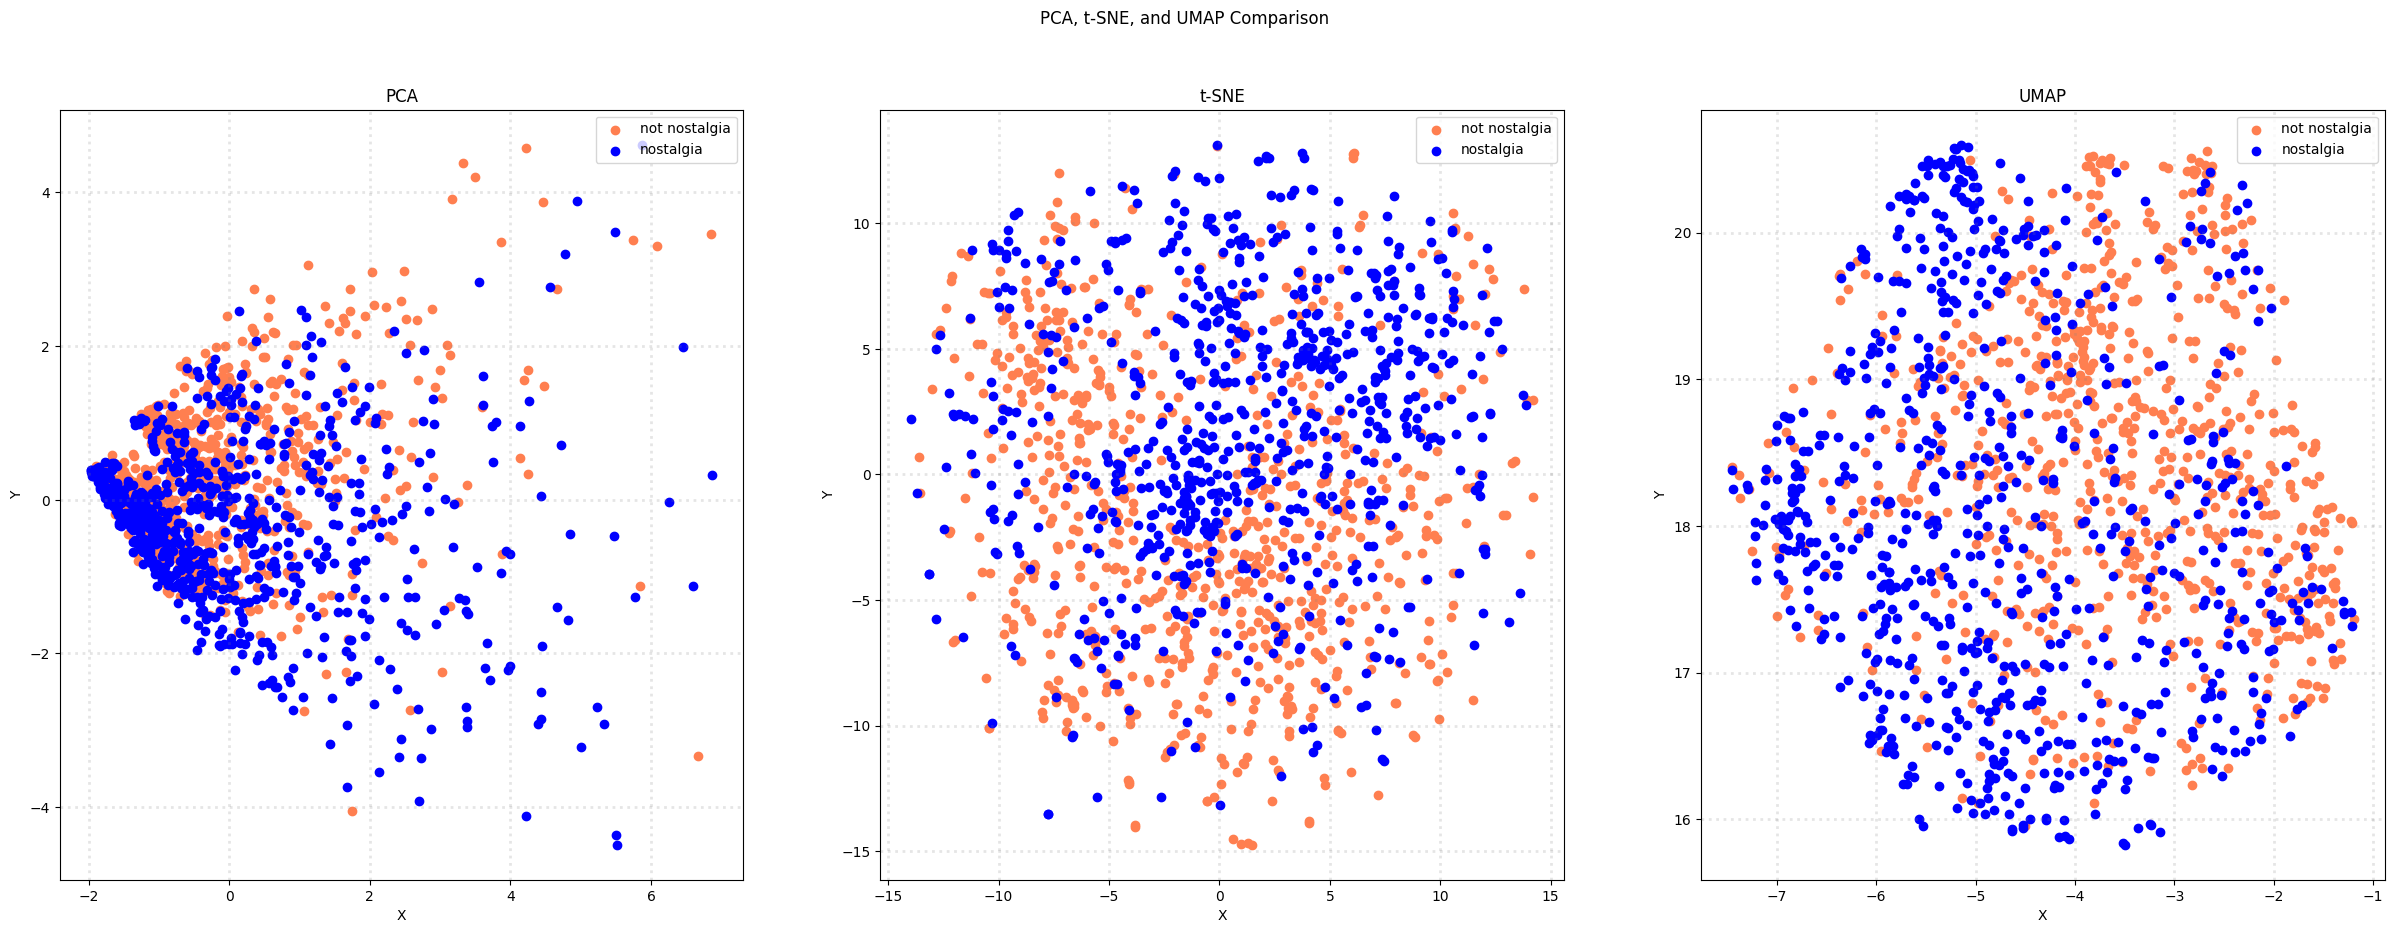

In [163]:
col = ['coral', 'blue']
categories = new['sentiment'].unique() 
fig, axes = plt.subplots(1, 3, figsize=(30, 10))  # Create 3 subplots for PCA, t-SNE, and UMAP
fig.suptitle('PCA, t-SNE, and UMAP Comparison')
 # Define a function to create a scatter plot for each method
def plot_scatter(ax, X_reduced, title):
    for c, category in zip(col, categories):
        xs = X_reduced[new['sentiment'] == category].T[0]
        ys = X_reduced[new['sentiment'] == category].T[1]
        ax.scatter(xs, ys, c=c, marker='o', label=category)
    
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend(loc='upper right')
 # Step 4: Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0], new_pca_tdm, 'PCA')
plot_scatter(axes[1], new_tsne_tdm, 't-SNE')
plot_scatter(axes[2], new_umap_tdm, 'UMAP')
plt.show()

In [177]:
# 使用one hot encoding根據類別分類(只有兩類，所以不用list表示)
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
mlb = preprocessing.LabelBinarizer()
new["bin_sentiment"]=mlb.fit_transform(new["sentiment"])

In [200]:
# take a peek on data(using cosine similarity)
a1=[new["comment"][100]]
a2=[new["comment"][200]]
a3=[new["comment"][300]]
a1=count_vect.transform(a1)
a2=count_vect.transform(a2)
a3=count_vect.transform(a3)
a3

<1x3730 sparse matrix of type '<class 'numpy.int64'>'
	with 10 stored elements in Compressed Sparse Row format>

In [208]:
# cosine_similarity用來衡量文字向量間的相關性，此值越高兩text語意越相似(已經透過Count Vector把相似性高的轉成相近的vector)
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import binarize

a1=binarize(a1)
a2=binarize(a2)
a3=binarize(a3)

cos_sim_count_1_2 = cosine_similarity(a1, a2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(a1, a3, dense_output=True)
cos_sim_count_2_3 = cosine_similarity(a2, a3, dense_output=True)

print(f"cosine similarity in a1_a2 is {cos_sim_count_1_2}")
print(f"cosine similarity in a1_a3 is {cos_sim_count_1_3}")
print(f"cosine similarity in a2_a3 is {cos_sim_count_2_3}")

cosine similarity in a1_a2 is [[0.20851441]]
cosine similarity in a1_a3 is [[0.06593805]]
cosine similarity in a2_a3 is [[0.31622777]]


## Naive Bayse


In [221]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import classification_report, accuracy_score

In [235]:
# 沒有augment的資料
x_train,x_test,y_train,y_test=train_test_split(tdm_df,new["bin_sentiment"],test_size=0.3,random_state=42)
ber=BernoulliNB()
ber.fit(x_train,y_train)
pred_noaug=ber.predict(x_test)
print(f"f1 accuracy {ber.score(x_test,y_test)}")
print(classification_report(y_test,pred_noaug,digits=4))


f1 accuracy 0.8733333333333333
              precision    recall  f1-score   support

           0     0.8443    0.9156    0.8785       225
           1     0.9078    0.8311    0.8677       225

    accuracy                         0.8733       450
   macro avg     0.8760    0.8733    0.8731       450
weighted avg     0.8760    0.8733    0.8731       450



In [239]:
# 有augment的資料
x_train,x_test,y_train,y_test=train_test_split(augmented_df,new["bin_sentiment"],test_size=0.3,random_state=42)
ber=BernoulliNB()
ber.fit(x_train,y_train)
pred_aug=ber.predict(x_test)
print(f"f1 accuracy {ber.score(x_test,y_test)}")
print(classification_report(y_test,pred_aug,digits=4))
# 結果的確比沒有augment好一點

f1 accuracy 0.8777777777777778
              precision    recall  f1-score   support

           0     0.8512    0.9156    0.8822       225
           1     0.9087    0.8400    0.8730       225

    accuracy                         0.8778       450
   macro avg     0.8799    0.8778    0.8776       450
weighted avg     0.8799    0.8778    0.8776       450



In [241]:
# 使用TF_IDF資料
x_train,x_test,y_train,y_test=train_test_split(tf_idf_df,new["bin_sentiment"],test_size=0.3,random_state=42)
ber=BernoulliNB()
ber.fit(x_train,y_train)
pred_tf_idf=ber.predict(x_test)
print(f"f1 accuracy {ber.score(x_test,y_test)}")
print(classification_report(y_test,pred_tf_idf,digits=4))


f1 accuracy 0.8733333333333333
              precision    recall  f1-score   support

           0     0.8443    0.9156    0.8785       225
           1     0.9078    0.8311    0.8677       225

    accuracy                         0.8733       450
   macro avg     0.8760    0.8733    0.8731       450
weighted avg     0.8760    0.8733    0.8731       450



### 結論:用augment後的資料效果會好一點，其餘兩者(沒有augment,TF-IDF)效果差不多